## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic=pd.read_csv(r"C:\Users\Anuradha\Desktop\titanic\train.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory data analysis

In [4]:
titanic['Age'].min()

0.42

In [5]:
titanic['Age'].max()

80.0

### kids as well as elder were travelling in titanic boat

### Missing data

In [6]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling missing data

<Axes: >

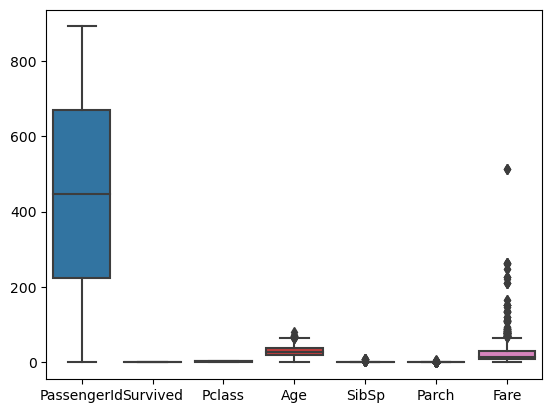

In [9]:
sns.boxplot(titanic)

In [10]:
from sklearn.impute import SimpleImputer


In [11]:
median_imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
titanic["Age"] = pd.DataFrame(median_imputer.fit_transform(titanic[["Age"]]))
titanic["Age"].isna().sum() 

0

In [12]:
titanic.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

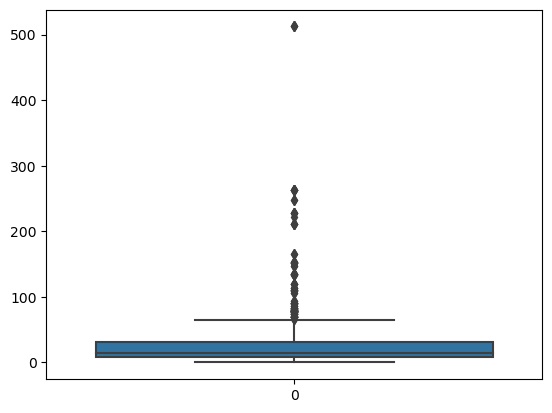

In [14]:
sns.boxplot(titanic['Fare'])

### Boxplot before treating with outliers

### Removing Outliers

In [15]:
IQR=titanic['Age'].quantile(0.75)-titanic['Age'].quantile(0.25)
IQR

13.0

In [16]:
lower_limit=titanic['Age'].quantile(0.25)-(IQR*1.5)
lower_limit

2.5

In [17]:
upper_limit=titanic['Age'].quantile(0.75)-(IQR*1.5)
upper_limit

15.5

In [18]:
from feature_engine.outliers import Winsorizer

In [19]:
winsor_iqr=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['Fare'])

In [20]:
titanic_outliers=winsor_iqr.fit_transform(titanic[['Fare']])

In [21]:
titanic_outliers

,Fare
0,7.2500
1,65.6344
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


<Axes: >

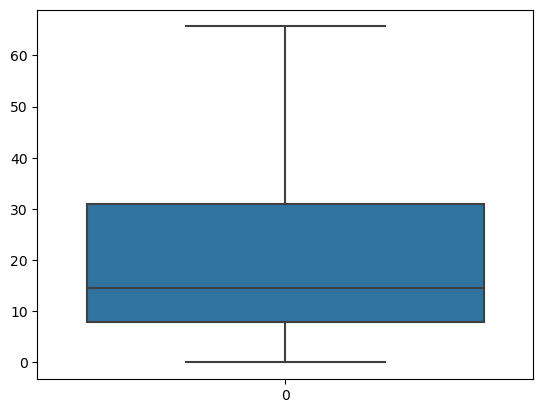

In [22]:
sns.boxplot(titanic_outliers['Fare'])

### boxplot after treating with outliers

In [23]:
titanic_outliers['Fare'].mean()

24.04681335578002

In [24]:
titanic_outliers['Fare'].median()

14.4542

In [25]:
titanic_outliers['Fare'].mode()

0    65.6344
Name: Fare, dtype: float64

In [26]:
titanic.corr()['Survived']

C:\Users\Anuradha\AppData\Local\Temp\ipykernel_15812\4027338334.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr()['Survived']


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.064910
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

<Axes: >

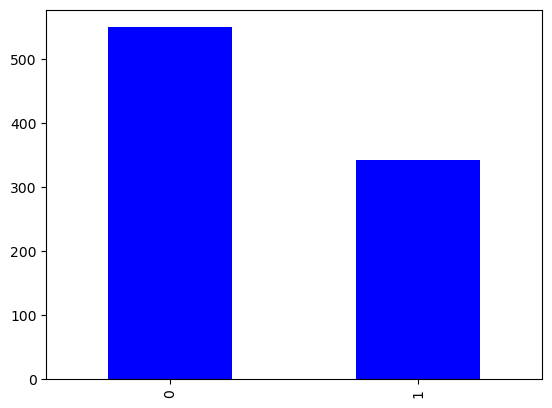

In [27]:
titanic['Survived'].value_counts().plot(kind='bar',color="blue")

#### Near about 550 peoples were not survived in Titanic ,whereas approximately 350 peoples were survived 

<Axes: xlabel='Survived', ylabel='count'>

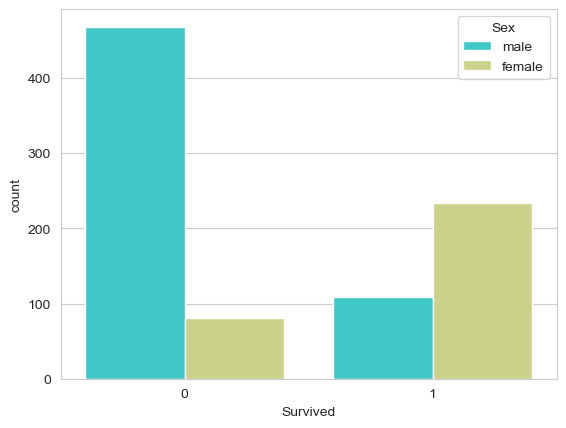

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette="rainbow")

<Axes: ylabel='Survived'>

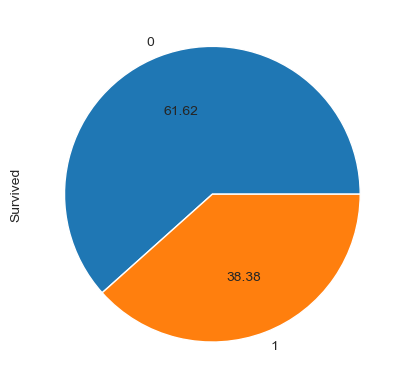

In [29]:
titanic['Survived'].value_counts().plot(kind="pie",autopct='%.2f')

### Among all 61.62% people are died and 38.38% people are survived.


### More women survived than men, reflecting the historical "women and children first" protocol during the Titanic tragedy.

<Axes: >

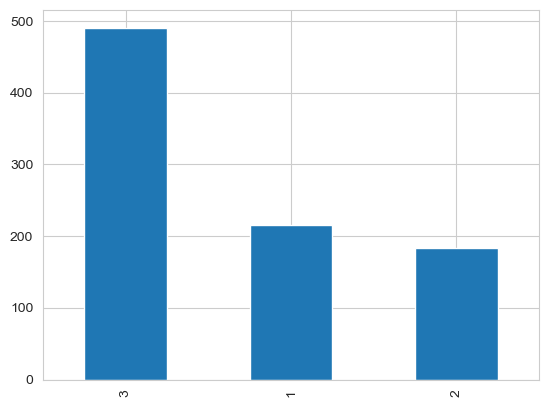

In [30]:
titanic['Pclass'].value_counts().plot(kind="bar")

### The majority of passengers were in the third class, outnumbering those in both second and first class accommodations.

<Axes: xlabel='Survived', ylabel='count'>

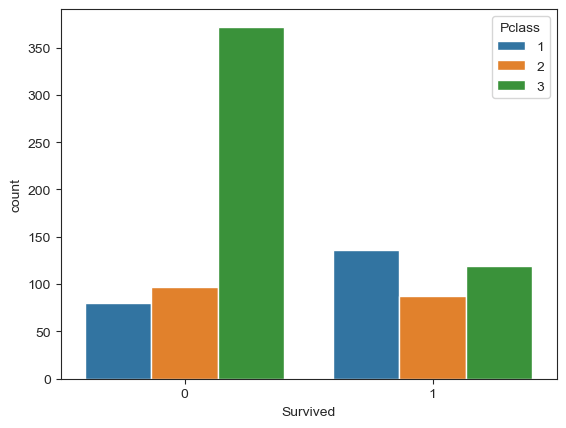

In [31]:
sns.set_style('ticks')
sns.countplot(x="Survived",hue="Pclass",data=titanic)

<Axes: ylabel='Pclass'>

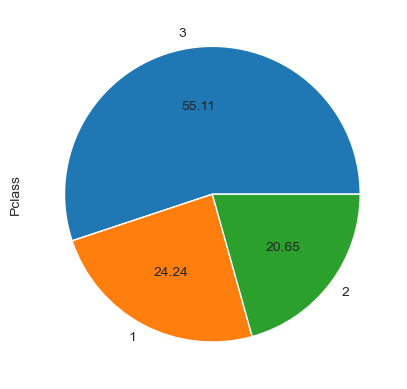

In [32]:
titanic['Pclass'].value_counts().plot(kind='pie',autopct="%.2f")

### A higher proportion of passengers opted for third-class accommodations, but unfortunately, a significant number of fatalities occurred among this group. Conversely, the first-class passengers had a comparatively higher survival rate than those in the other classes.




<Axes: ylabel='Sex'>

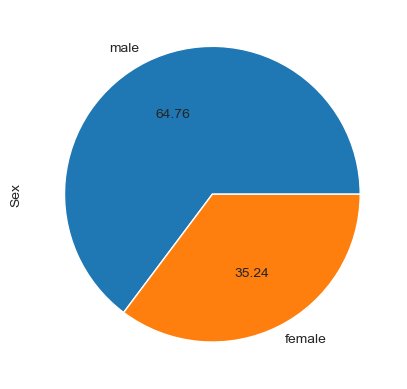

In [33]:
titanic['Sex'].value_counts().plot(kind="pie",autopct="%.2f")

### The number of male passengers on the Titanic exceeded the number of female passengers.






In [34]:
titanic.Age.mean()

29.36158249158249

In [35]:
titanic.Age.median()

28.0

In [36]:
titanic.Age.mode()

0    28.0
Name: Age, dtype: float64

### The average age of individuals aboard the Titanic was approximately 29 years.




 

In [37]:
titanic.var()

C:\Users\Anuradha\AppData\Local\Temp\ipykernel_15812\3881755987.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.var()


PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              169.512498
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

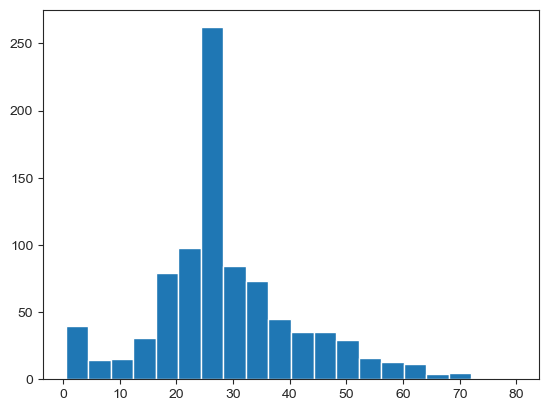

In [38]:
plt.hist(titanic['Age'],bins=20)

### A large proportion of the passengers on the Titanic fell within the age range of 17 to 35.




 

C:\Users\Anuradha\AppData\Local\Temp\ipykernel_15812\3677708691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'])


<Axes: xlabel='Age', ylabel='Density'>

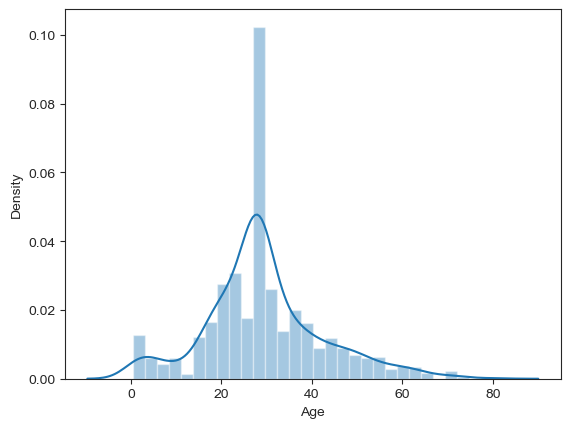

In [39]:
sns.distplot(titanic['Age'])

In [40]:
titanic['Fare'].mean()

32.204207968574636

In [41]:
titanic['Fare'].median()

14.4542

In [42]:
titanic['Fare'].mode()

0    8.05
Name: Fare, dtype: float64

In [43]:
titanic.var()

C:\Users\Anuradha\AppData\Local\Temp\ipykernel_15812\3881755987.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.var()


PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              169.512498
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

In [44]:
titanic.std()

C:\Users\Anuradha\AppData\Local\Temp\ipykernel_15812\4084194749.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.std()


PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             13.019697
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64

In [45]:
titanic.skew()

C:\Users\Anuradha\AppData\Local\Temp\ipykernel_15812\1596635564.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.skew()


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.510245
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

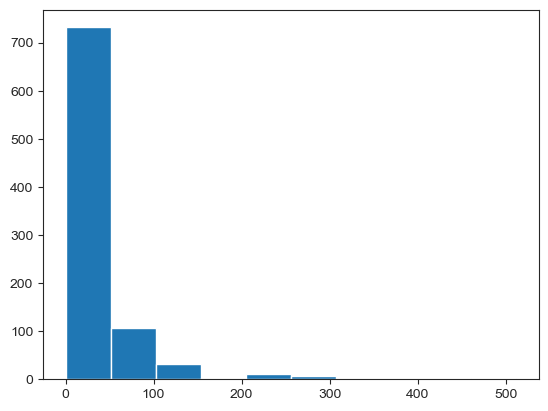

In [46]:
plt.hist(titanic['Fare'])